In [1]:
from plotnine import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scikitplot as sciplt

/home/chris/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/chris/.local/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
lmc_file = "RRab_lmc_oost.csv"
lmc = pd.read_csv(lmc_file)

print(lmc.info())
lmc.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23903 entries, 0 to 23902
Data columns (total 29 columns):
I_amplitude           23903 non-null float64
R21                   23903 non-null float64
R31                   23903 non-null float64
V-I_max               23903 non-null float64
V-I_min               23903 non-null float64
V_amplitude           23903 non-null float64
id                    23903 non-null object
log_p                 23903 non-null float64
mean_I_magnitude      23903 non-null float64
mean_V_magnitude      23903 non-null float64
metalicity_jk_v       23903 non-null float64
metalicity_jkzw_v     23903 non-null float64
metalicity_neme       23903 non-null float64
metalicity_sand       23903 non-null float64
metalicity_smol       23903 non-null float64
period                23903 non-null float64
period_uncertainty    23903 non-null float64
phi21                 23903 non-null float64
phi31                 23903 non-null float64
phi31_i_sine          23903 non-null 

,I_amplitude,R21,R31,V-I_max,V-I_min,V_amplitude,log_p,mean_I_magnitude,mean_V_magnitude,metalicity_jk_v,...,phi31,phi31_i_sine,phi31_v_deb,phi31_v_skow,time_max_bright,density,curve,y,clusters,boundary
count,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,...,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000,23903.000000
mean,0.546320,0.450708,0.301774,2.032028,-0.872720,1.013632,-0.242474,18.745808,19.342172,-1.351912,...,2.564506,5.706099,5.034232,5.051736,6000.287249,10.688341,0.508168,0.038152,0.326319,0.687845
std,0.175543,0.058024,0.073498,28.540727,22.632416,0.364053,0.052065,0.459851,0.485511,0.310531,...,0.479445,0.479445,0.272325,0.324403,0.171584,7.101978,0.395316,0.339562,0.729694,0.395316
min,0.018000,0.070000,0.047000,-1.464194,-1594.753711,0.043000,-0.588872,12.785000,13.351000,-3.180336,...,0.020000,3.161593,3.588953,4.179277,6000.000010,0.020029,-6.858100,-3.538382,0.000000,-6.678422
25%,0.422000,0.422000,0.255500,0.661046,0.248690,0.776000,-0.276601,18.666000,19.224000,-1.516971,...,2.208000,5.349593,4.831737,4.810219,6000.140740,4.413638,0.381704,-0.091259,0.000000,0.561381
50%,0.549000,0.459000,0.320000,0.712579,0.350095,1.010000,-0.240997,18.785000,19.357000,-1.374432,...,2.509000,5.650593,5.002705,4.988418,6000.282660,9.981037,0.552558,-0.000469,0.000000,0.732235
75%,0.674000,0.488000,0.360000,0.792407,0.453632,1.220500,-0.208588,18.904000,19.505000,-1.227326,...,2.880000,6.021593,5.213433,5.238474,6000.426170,16.310075,0.707775,0.089855,0.000000,0.887453
max,1.632000,0.899000,0.856000,2532.312886,1.687388,5.968000,-0.014567,20.558000,21.925000,4.672178,...,6.271000,9.412593,7.139521,9.080377,6000.861730,24.560601,3.978382,7.242100,2.000000,4.158060


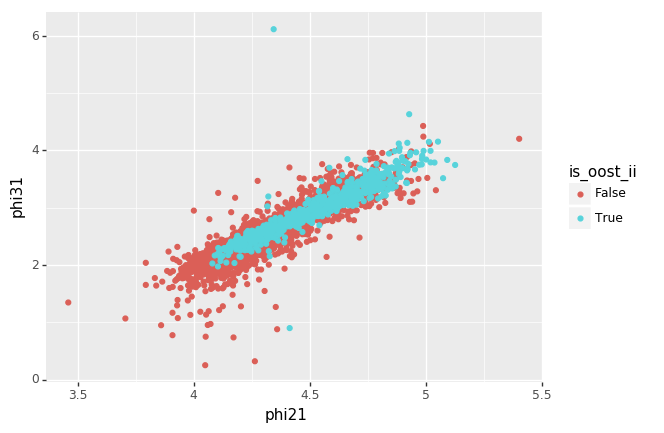

<ggplot: (-9223363258636340571)>

In [3]:
ggplot(lmc.iloc[:5000], aes("phi21", "phi31", color="is_oost_ii")) +\
    geom_point()

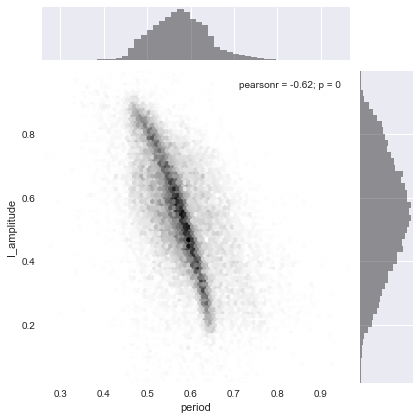

In [4]:
sns.jointplot(data=lmc[lmc["I_amplitude"] < 1.0], x="period", y="I_amplitude", kind="hex", color="k")
plt.show()

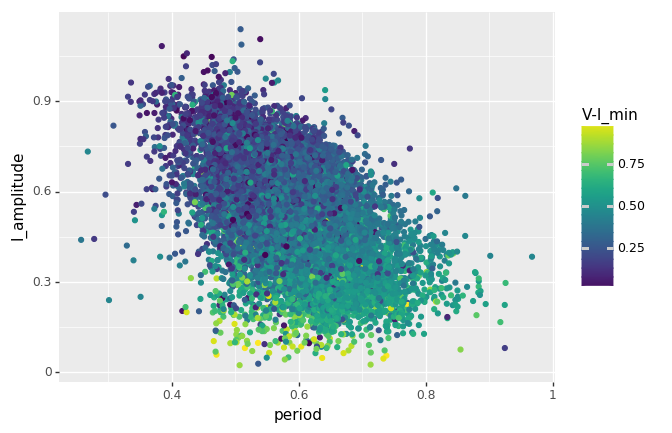

<ggplot: (-9223363258636818330)>

In [5]:
ggplot(lmc[np.logical_and(lmc["V-I_min"] < 1, lmc["V-I_min"] > 0)], aes("period", "I_amplitude", color="V-I_min")) +\
    geom_point()

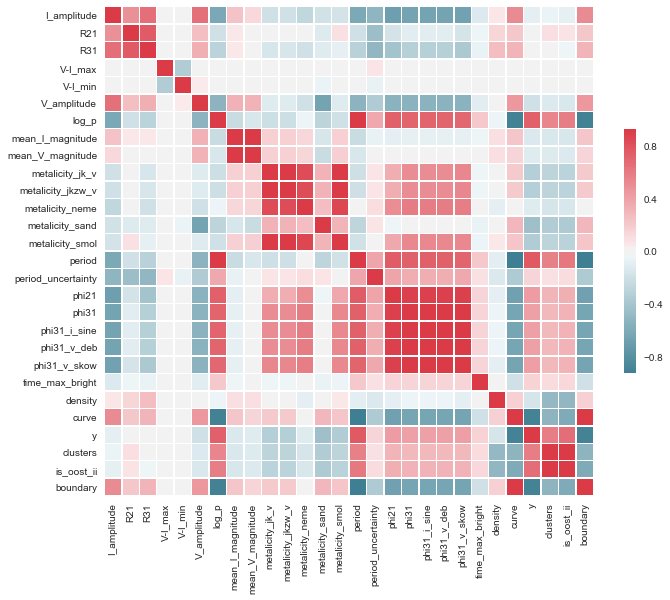

In [6]:
corr = lmc.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [7]:
corr["is_oost_ii"]

I_amplitude          -0.073172
R21                   0.079125
R31                  -0.041780
V-I_max              -0.004805
V-I_min               0.001716
V_amplitude          -0.139903
log_p                 0.581963
mean_I_magnitude     -0.151080
mean_V_magnitude     -0.127999
metalicity_jk_v      -0.294803
metalicity_jkzw_v    -0.294803
metalicity_neme      -0.146453
metalicity_sand      -0.360744
metalicity_smol      -0.301609
period                0.613502
period_uncertainty    0.110126
phi21                 0.338368
phi31                 0.316578
phi31_i_sine          0.316578
phi31_v_deb           0.316578
phi31_v_skow          0.315227
time_max_bright       0.125529
density              -0.503716
curve                -0.601083
y                     0.661949
clusters              0.988083
is_oost_ii            1.000000
boundary             -0.601083
Name: is_oost_ii, dtype: float64

In [8]:
from sklearn.ensemble import RandomForestClassifier

features = ["I_amplitude", "R21", "R31", "V-I_max", "V-I_min", "V_amplitude", "mean_I_magnitude", "mean_V_magnitude", "metalicity_jk_v", "metalicity_jkzw_v", "metalicity_neme", "metalicity_sand", "metalicity_smol", "period", "period_uncertainty", "phi21", "phi31", "phi31_i_sine", "phi31_v_deb", "phi31_v_skow"]
label = "is_oost_ii"

X_rf = lmc.as_matrix(features)
y_rf = lmc.as_matrix([label])

rf = RandomForestClassifier(random_state=0)
rf.fit(X_rf, y_rf)

/home/chris/.local/lib/python3.5/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

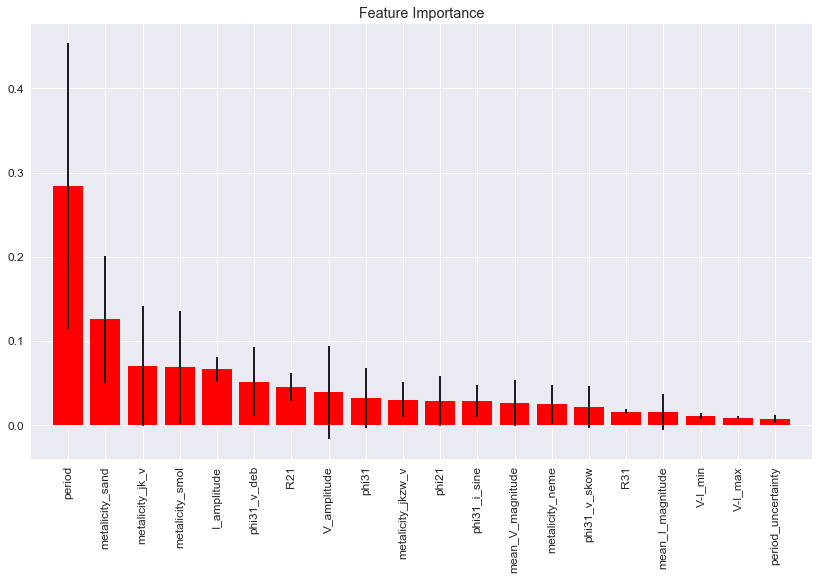

In [9]:
sciplt.plotters.plot_feature_importances(rf, feature_names=features, x_tick_rotation=90, figsize=(14,8))
plt.show()

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca = PCA(2)
scaler = StandardScaler()

pipe = make_pipeline(scaler, pca)
pipe.fit(X_rf)

X_rf_pca = pipe.transform(X_rf)
lmc_pca = pd.DataFrame(X_rf_pca, columns=["A", "B"])
lmc_pca["is_oost_ii"] = y_rf

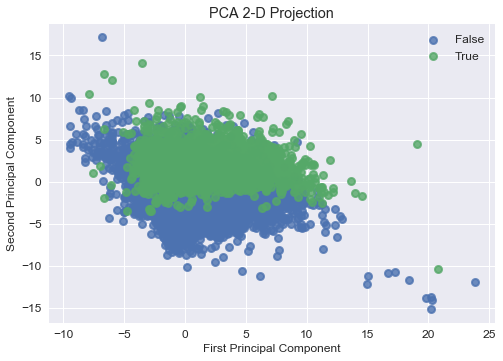

In [11]:
sciplt.plotters.plot_pca_2d_projection(pipe, X_rf, y_rf[:,0])
plt.show()

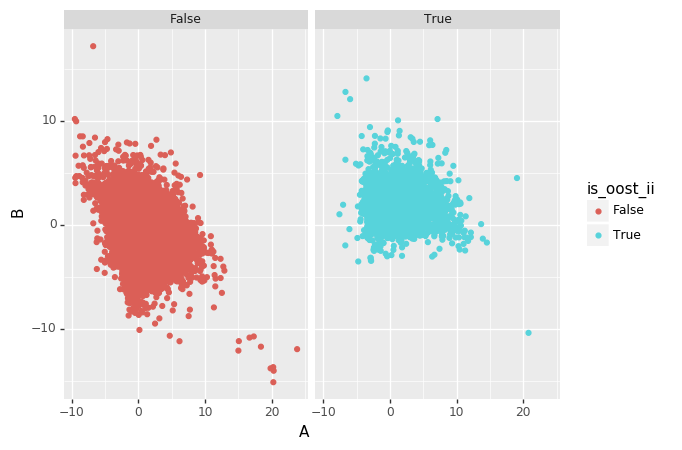

<ggplot: (8778217839950)>

In [12]:
ggplot(lmc_pca, aes("A", "B", color="is_oost_ii")) +\
    facet_wrap("~is_oost_ii") +\
    geom_point()

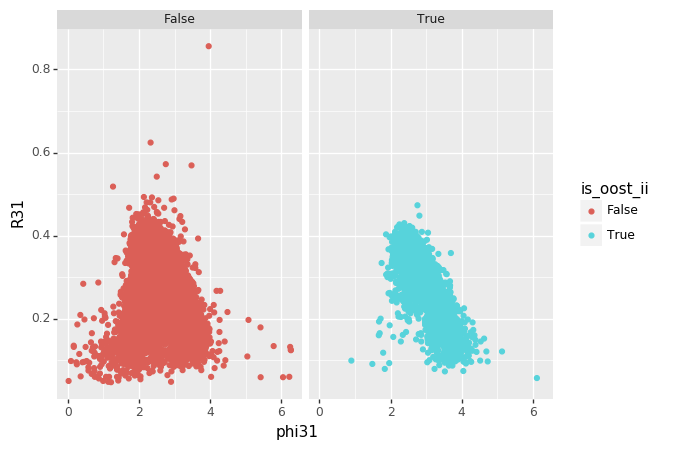

<ggplot: (8778204455856)>

In [35]:
ggplot(lmc, aes("phi31", "R31", color="is_oost_ii")) +\
    facet_wrap("~is_oost_ii") +\
    geom_point()

In [32]:
from sklearn.cluster import KMeans, SpectralClustering

features = ["period", "I_amplitude", "phi31", "R31"]#, "phi31", "V-I_max", "R31", "metalicity_jk_v", "V-I_min"]

X_kmeans = lmc.as_matrix(features)[0:5000]

spec = SpectralClustering(n_clusters=6, affinity='nearest_neighbors',
                           assign_labels='kmeans', random_state = 1)
#kmeans = KMeans(5, random_state=0)
scaler = StandardScaler()

pipe = make_pipeline(scaler, spec)

clusters = pipe.fit_predict(X_kmeans)
#lmc["kmeans_clusters"] = clusters

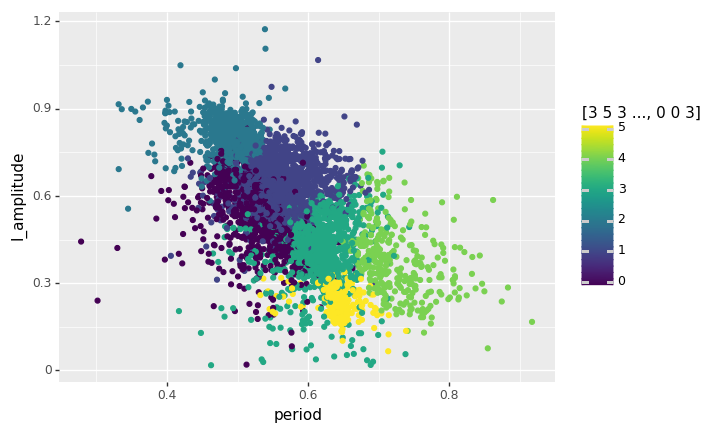

<ggplot: (8778213789942)>

In [33]:
ggplot(lmc.iloc[:5000], aes("period", "I_amplitude", color=clusters)) +\
    geom_point()